In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [3]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [4]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 44008
catalog = 'JPL'
mol_str = f'null'
cubes, tbl = fetch_cubes(cubefns, catalog=catalog, mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=40>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG   QNFMT   QN'     QN"  
   MHz       MHz   MHz nm2        1 / cm                                    
 float64   float64 float64 int64 float64  int64 int64  int64   str7    str7 
---------- ------- ------- ----- -------- ----- ------ ----- ------- -------
87598.3156  0.0926 -5.4593     3  34.3874     7  44008   304 4 1 4 3 3 1 3 3
87599.0014  0.0251 -7.2586     3  34.3874     7  44008   304 4 1 4 3 3 1 3 4
  87599.12    0.03  -4.168     3  34.3874    11 -44008   304 4 1 4 5 3 1 3 4
  87599.12    0.03 -4.4013     3  34.3874     7 -44008   304 4 1 4 3 3 1 3 2
  87599.12    0.03 -4.2832     3  34.3874     9 -44008   304 4 1 4 4 3 1 3 3
87599.9695  0.0747 -5.4592     3  34.3874     9  44008   304 4 1 4 4 3 1 3 4
87869.6683   0.052 -6.2876     3  274.436     9  44008   304 4 3 2 4 3 3 1 4
87869.6683   0.052 -6.2876     3  274.436     9  44008   304 4 3 1 4 3 3 0 4
87869.6767  0.0509 -5.2296     3  274.436     7  44008   

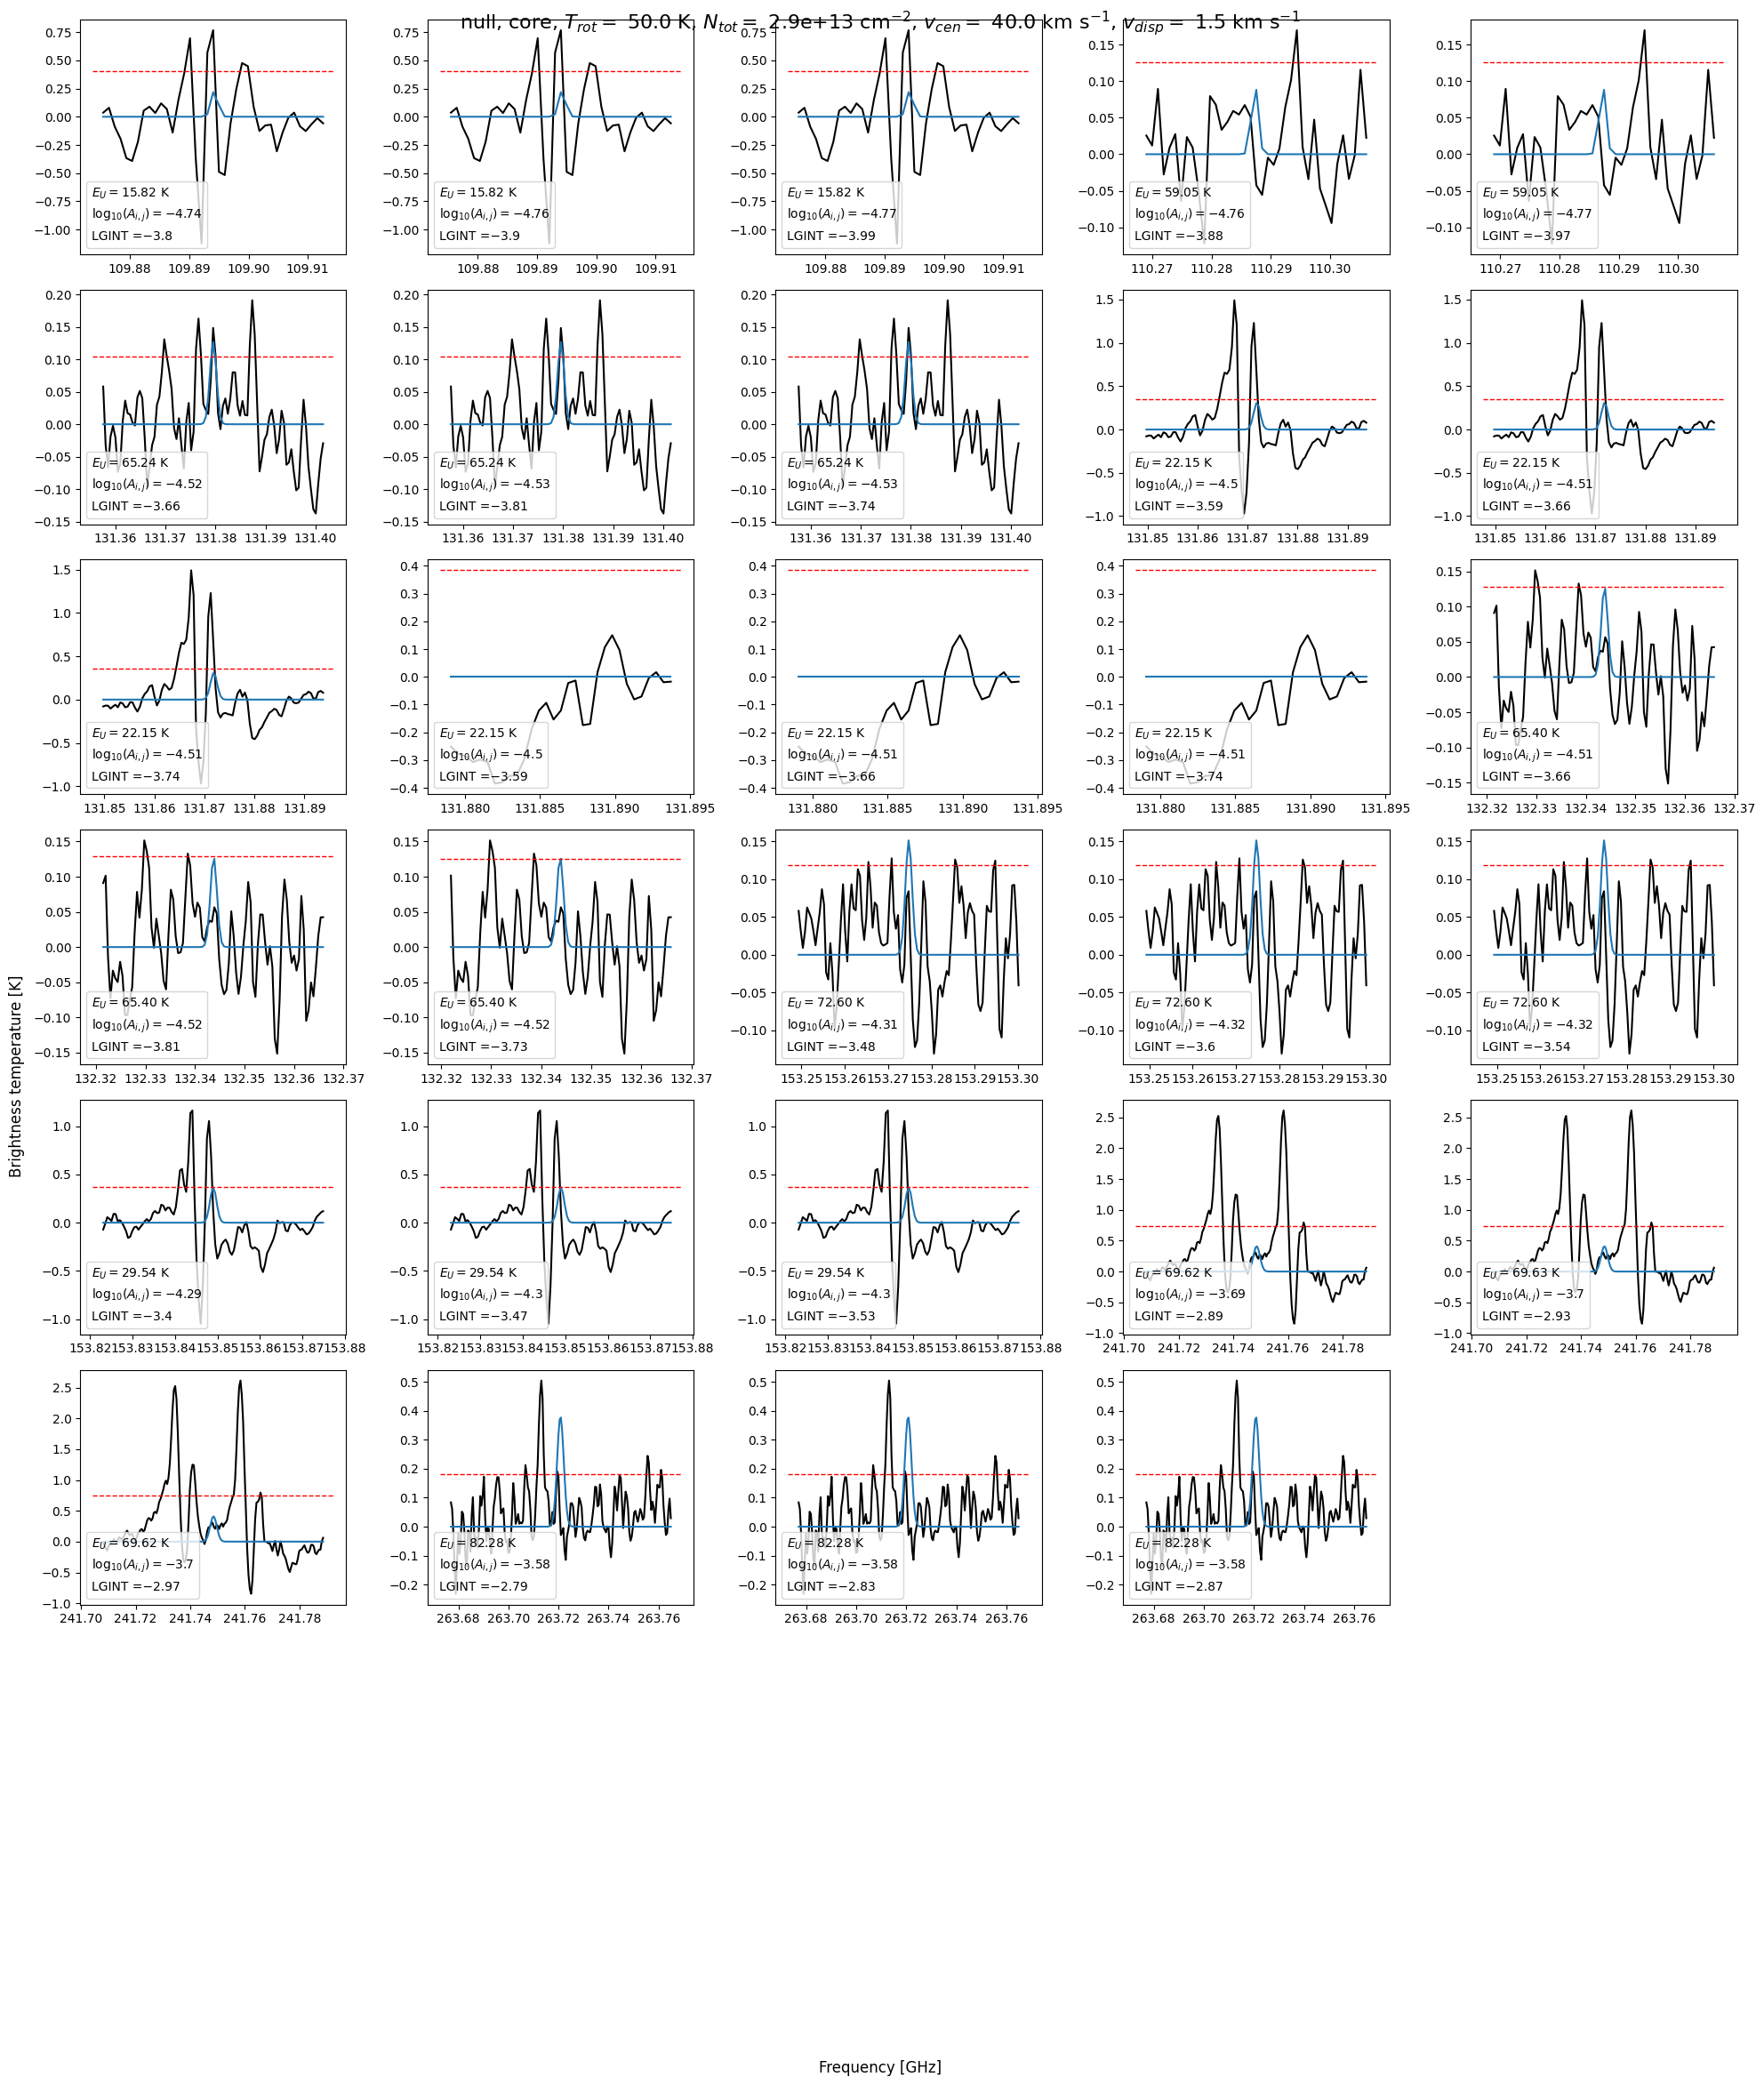

In [7]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 2.9e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
               nrows=8, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str, extr_type="coord", crd=crd,
               show_2_sigma=True, LGINT_cutoff=-4)

In [8]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

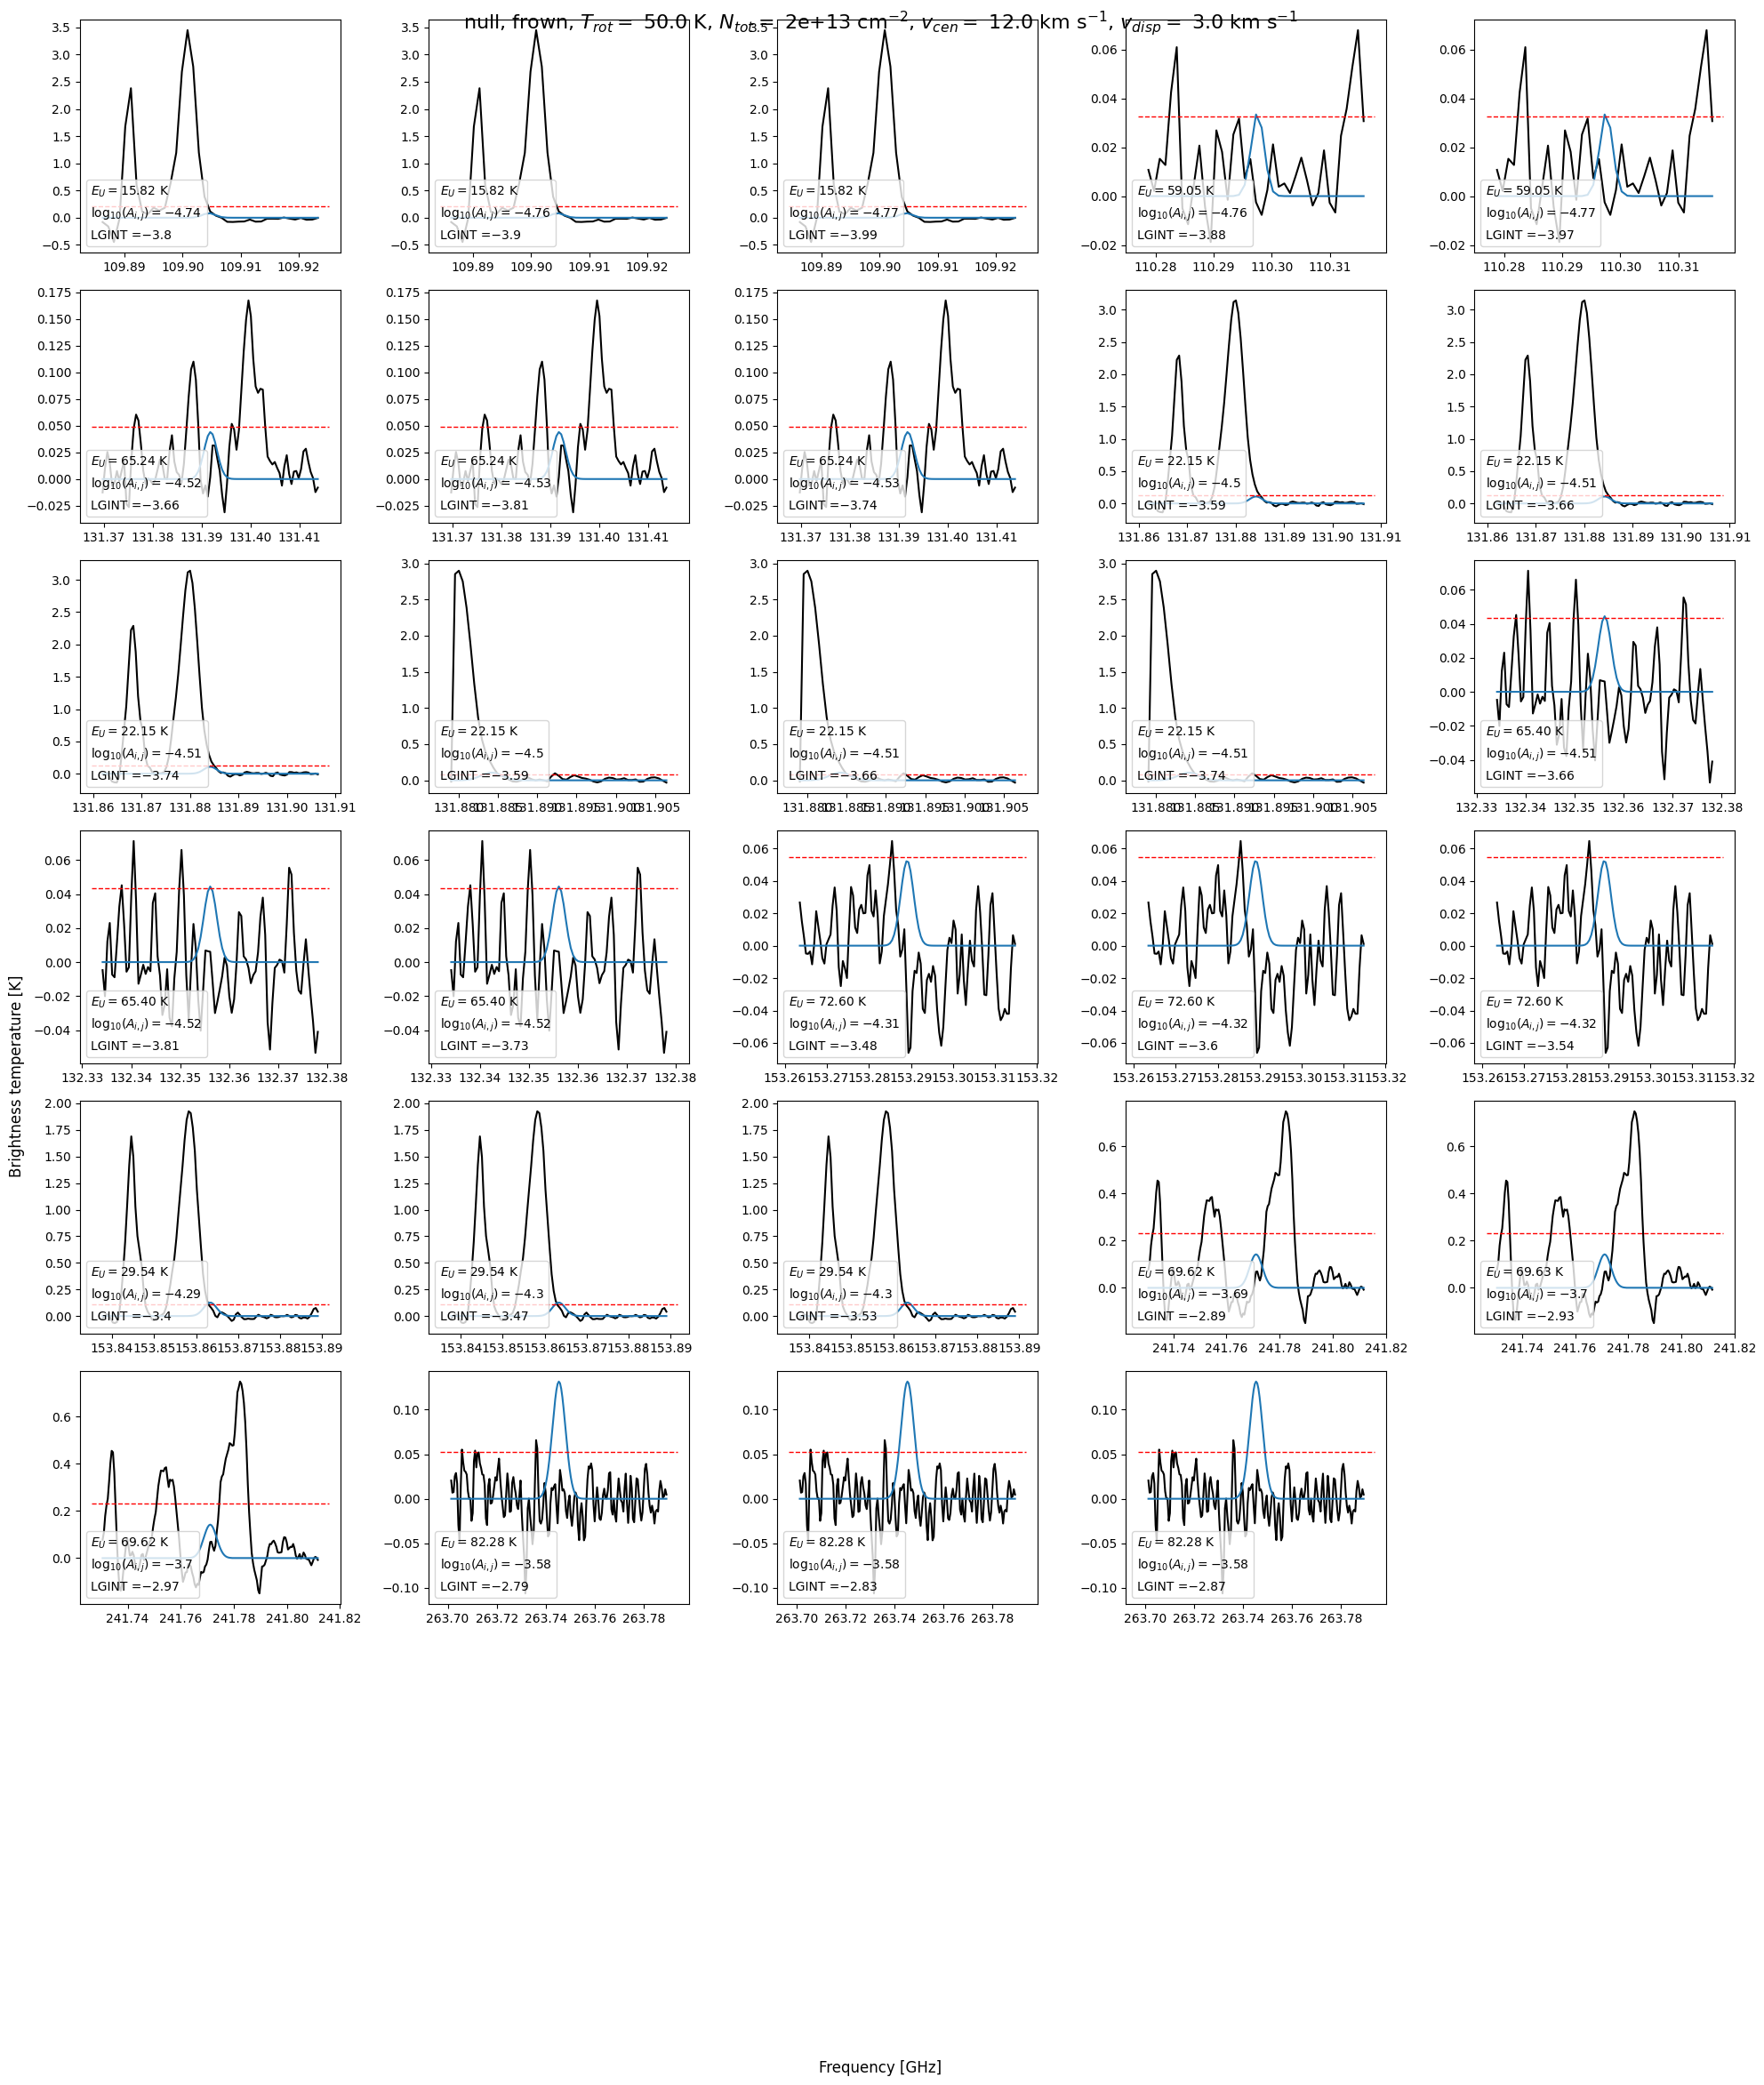

In [9]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 2.0e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
                       nrows=8, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str,
                       extr_type="reg", show_2_sigma=True, return_freqs=True, LGINT_cutoff=-4)

ValueError: num must be an integer with 1 <= num <= 12, not 13

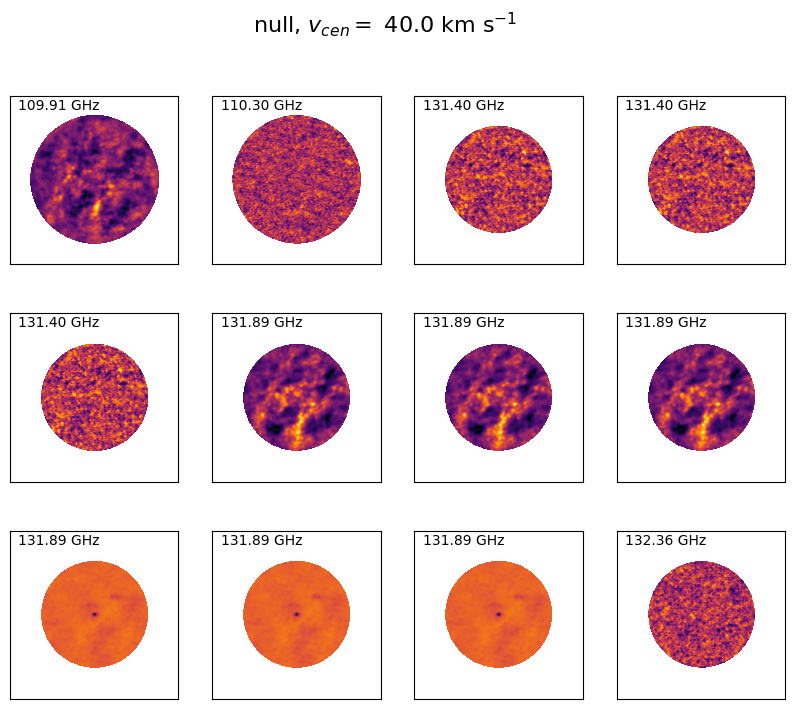

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)